# Shifted-tilted Tophat at Gaussian interference at waist

Applying first-order shift,tilt to tophat, integrate with HG00

\begin{equation}
	u_{n,m} \rightarrow
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	\exp(i \Psi(z))
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

Scatter these with

\begin{align*}
\sum_{n,m} u_{n,m} \rightarrow 
	\sum_{n,m} 
	\lbrace &
		u_{n+2,m}[ X_+^2(-i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n+1,m}[ X_+^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n,m} [1+X_+^1(ik\alpha \frac{2a\sqrt{n}}{w} e^{i\Psi})- X_0^2 (i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n-1,m} [\frac{2a\sqrt{n}}{w} e^{i\Psi} + X_-^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n-2,m} [ X_-^1(ik\alpha a\frac{2\sqrt{n}}{w}e^{i\Psi}) - X_-^2 (i\frac{2ka\alpha}{w^2})] 	
	\rbrace
\end{align*}

In [1]:
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm

from numpy import pi as pi
from numpy import angle
from math import e
from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from math import factorial as fact
import cmath
from cmath import sqrt as sqrt
import numpy as np

inf=np.inf

import pandas as pd

## Tophat coeffients from AW

In [2]:

modes = plb.modes((0,0,1))


In [3]:
z=0
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 1e-3,0)

print(params)
print(plane)



wavelength=1.064e-06
w0=0.001
z0=0
Zr=2.952624674426497
q0=2.952624674426497j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [4]:
a = 100e-6
alpha = 10e-6


## Build Modes from coupling coefficients

In [5]:
#Apply scatter to create new modes

sc_modes = pl.scatter_case2_first_order(z,params,a,alpha,modes)



## Calculate amp/phase and plot to check single shift/tilt (just a visual ref.) 

In [6]:
f2 = pl.calculate(params,plane,modes,z)

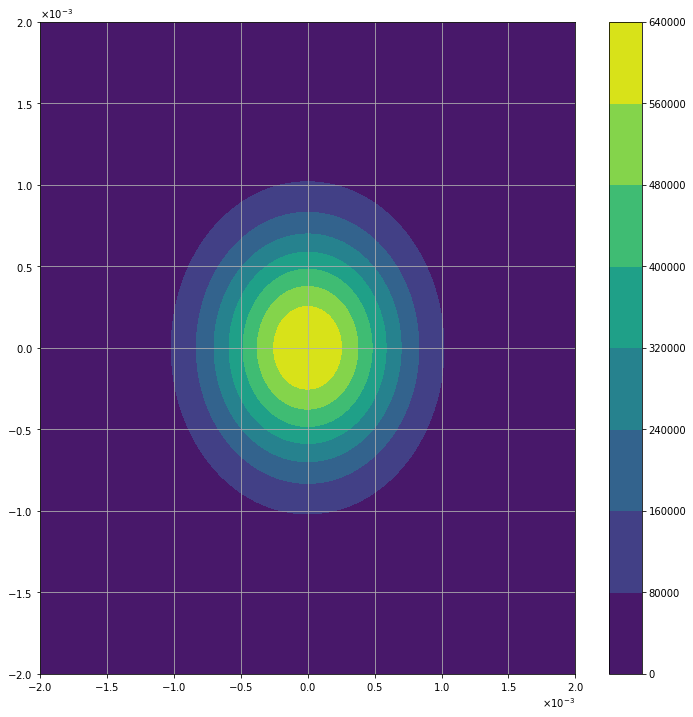

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

#plt.savefig("th_full_first_order.png")

## Integration for signals

In [21]:
#initial int. params
Y = 2e13 #Y int bound

Z = z

x_1R = 0
x_2R = 2e13 

x_1L = -2e13
x_2L = 0

w_1 = 1e-3
w_2 = 1e-3

zR_1 = 2.952624674426497
zR_2 = 2.952624674426497


k_1 = 5905249.348852994
k_2 = 5905249.348852994

d_1 = 0

W_2 = 1e-3

In [22]:
#loop through and sum over modes overlap where a,b -> n,m
def iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y,modes_arr):    
    N = len(modes_arr)
    M = len(modes_arr[0])
    
    res = 0
    
    for a in range(N):
        for b in range(M):            
            #ignore zero coeff.
            if (modes_arr[a][b]!=0):
                c_nm = modes_arr[a][b]
                
                res += c_nm * th.overlap(a,b,w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y)  
                
    return(res)

In [26]:
points = 111

modes_arr = [0]*points
cl = [0]*points
cr = [0]*points
phi_l = [0]*points
phi_r = [0]*points
dws = [0]*points
lps = [0]*points


alpha_arr = np.linspace(-500e-6,500e-6,points)

for p in range (points):
    modes_arr[p] = pl.scatter_case2_first_order(z,params,a,alpha_arr[p],modes) #array of array of scattered modes#array of array of scattered modes

    
    cl[p] = iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1L,x_2L,Z,Y,modes_arr[p]) # left overlap (-2e-3,0)
    cr[p] = iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1R,x_2R,Z,Y,modes_arr[p]) # right overlap (0,2e-3)
    

    phi_r[p]=angle(cr[p])
    phi_l[p]=angle(cl[p])
    
    dws[p] = (phi_r[p]-phi_l[p])/2
    lps[p] = 0.5*(phi_r[p]+phi_l[p])
    


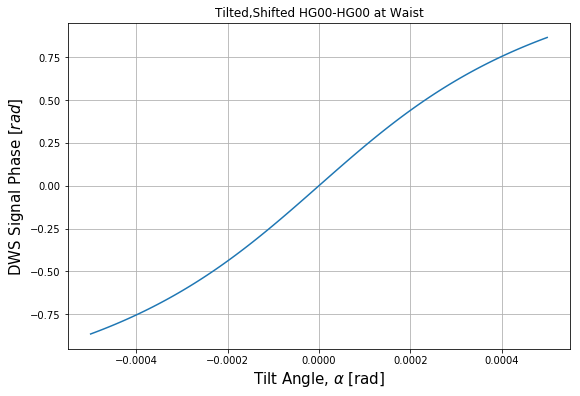

In [27]:
plt.figure(figsize=(9,6))
plt.plot(alpha_arr, dws)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()

#plt.savefig("4-28_HG00_dws.png")

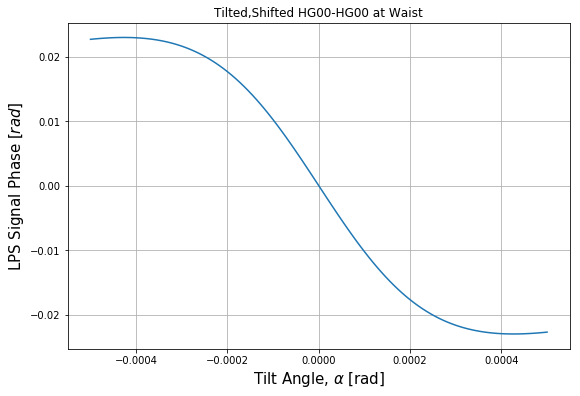

In [28]:
plt.figure(figsize=(9,6))
plt.plot(alpha_arr, lps)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()

#plt.savefig("4-28_HG00_lps.png")

In [13]:
print(params.getZr())

2.952624674426497


In [14]:
print(params.getK())

5905249.348852994
